In [1]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv("/Users/milan/OneDrive/Documentos/python-ml-course-master/datasets/ecom-expense/Ecom Expense.csv")
data.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [3]:
# Transformar varibles categoricas en numericas
dummy_gender= pd.get_dummies(data["Gender"],prefix="Gender")
dummy_cityTier= pd.get_dummies(data["City Tier"], prefix="City")
# hacer joind de estas variables al data set principal
data_new=data.join(dummy_gender).join(dummy_cityTier)
data_new.tail()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
2357,TXN2358,50,7,5705,460.157207,3,Male,Tier 2,2909.619546,0,1,0,1,0
2358,TXN2359,35,11,11202,851.924751,8,Male,Tier 2,7968.633136,0,1,0,1,0
2359,TXN2360,27,5,21335,435.145358,8,Female,Tier 3,8816.406448,1,0,0,0,1
2360,TXN2361,45,12,19294,658.439838,7,Female,Tier 1,7915.595856,1,0,1,0,0
2361,TXN2362,46,7,2855,560.514341,8,Male,Tier 1,6832.401686,0,1,1,0,0


In [4]:
feature_cols=["Transaction Time", "Monthly Income", "Gender_Female","Record", "Gender_Male", "City_Tier 1", "City_Tier 2", "City_Tier 3"]
x=data_new[feature_cols]
y=data_new["Total Spend"]
lm = LinearRegression()
lm.fit(x,y)

LinearRegression()

In [5]:
asd=[feature_cols,lm.coef_.tolist()]
lm.intercept_, asd

(-79.4171302985369,
 [['Transaction Time',
   'Monthly Income',
   'Gender_Female',
   'Record',
   'Gender_Male',
   'City_Tier 1',
   'City_Tier 2',
   'City_Tier 3'],
  [0.1549461254904771,
   0.14753898049204883,
   -131.02501325554633,
   772.2334457445637,
   131.0250132555463,
   76.76432601049522,
   55.138974309232495,
   -131.90330031972778]])

In [6]:
lm.score(x,y)

0.9179923586131016

**La formula final Ye es:**
* -79.4171302985369 + Transaction Time*0.1549461254904771 + Monthly Income * 0.14753898049204883 + Gender_Female * -131.02501325554633 + Gender_Male * 131.0250132555463 + Record * 772.2334457445637 + City_Tier 1 * 76.76432601049522 + City_Tier 2 * 55.138974309232495 + City_Tier 3 * -131.90330031972778


In [7]:
data_new["prediction"]= -79.4171302985369 + data_new["Transaction Time"]*0.1549461254904771 + data_new["Monthly Income"] * 0.14753898049204883 + data_new["Gender_Female"]*-131.02501325554633 + data_new["Gender_Male"] * 131.0250132555463 + data_new["Record"]*772.2334457445637 + data_new["City_Tier 1"]*76.76432601049522 + data_new["City_Tier 2"]*55.138974309232495 + data_new["City_Tier 3"]*-131.90330031972778
data_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,prediction
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335


In [8]:
SSD=sum((data_new["prediction"]-data["Total Spend"])**2)
RSE= np.sqrt(SSD/(len(data_new)-len(feature_cols)-1))
error = RSE/np.mean(data["Total Spend"])
SSD, RSE, error

(1517733985.3408194, 803.1318809818173, 0.13031135680294173)

**Siguiendo los resultados la diferencia entre los valores observados y predichos es de 803.1319 USD, dando una tasa de error en la predicción del 13,04%. Todo esto visto en la formula general**

Siguiendo lo anterior, la formula general solo es capaz de predecir con una alta presición los valores en forma general, pero al necesitar una formula que explique casos precisos con ciertas variables categoricas debemos transforar la formula general en una especifica para cada caso.

Para lograr esto a la formula general para cada caso se le debe de quitar las variables categoricas y dejar aquellas que son utiles para cada caso. El número de casos que se debe de manejar sera equivalente a 1 por cada categoria en estas variables, y de haber mas de una variable categoricas el numero aumentará igual a la multiplicación de las cantidades de variables categoricas de cada una de estas. Si son 2 variables categoricas de 4 opciones, se tendra que hacer 16 formulas para cada caso cruzado de variables categoricas.

Para este caso las formulas son las siguientes:
* Hombre
    * tier 1:-79.4171302985369 + Transaction Time*0.1549461254904771 + Monthly Income * 0.14753898049204883  + Gender_Male * 131.0250132555463 + Record * 772.2334457445637 + City_Tier 1 * 76.76432601049522
    * tier 2:-79.4171302985369 + Transaction Time*0.1549461254904771 + Monthly Income * 0.14753898049204883  + Gender_Male * 131.0250132555463 + Record * 772.2334457445637 + City_Tier 2 * 55.138974309232495
    * tier 3:-79.4171302985369 + Transaction Time*0.1549461254904771 + Monthly Income * 0.14753898049204883  + Gender_Male * 131.0250132555463 + Record * 772.2334457445637 + City_Tier 3 * -131.90330031972778
* Mujer
    * tier 1:-79.4171302985369 + Transaction Time*0.1549461254904771 + Monthly Income * 0.14753898049204883 + Gender_Female * -131.02501325554633 + Record * 772.2334457445637 + City_Tier 1 * 76.76432601049522
    * tier 2:-79.4171302985369 + Transaction Time*0.1549461254904771 + Monthly Income * 0.14753898049204883 + Gender_Female * -131.02501325554633 + Record * 772.2334457445637 + City_Tier 2 * 55.138974309232495
    * tier 3:-79.4171302985369 + Transaction Time*0.1549461254904771 + Monthly Income * 0.14753898049204883 + Gender_Female * -131.02501325554633 + Record * 772.2334457445637 + City_Tier 3 * -131.90330031972778
    
________________
## Reducción de la formula
Dentro de las formulas resultantes la variable categorica siempre valdrán 1 por lo que no es necesario dejar la multiplicación que involucra a la misma, por lo que el valor Beta para a sumar/resta directamente a la intercepción/alfa

* Hombre
Por lo que las ofrmulas pueden quedar así:
    * tier 1:(-79.4171302985369  + 131.0250132555463 + 76.76432601049522) + Transaction Time*0.1549461254904771 + Monthly Income * 0.14753898049204883 + Record*772.2334457445637
    * tier 2:(-79.4171302985369 + 55.138974309232495 + 131.0250132555463) + Transaction Time*0.1549461254904771 + Monthly Income*0.14753898049204883  + Record*772.2334457445637
    * tier 3:(-79.4171302985369 + 131.0250132555463 -131.90330031972778) + Transaction Time*0.1549461254904771 + Monthly Income*0.14753898049204883 + Record*772.2334457445637
* Mujer
    * tier 1:(-79.4171302985369 -131.02501325554633 + 76.76432601049522) + Transaction Time*0.1549461254904771 + Monthly Income * 0.14753898049204883  + Record * 772.2334457445637
    * tier 2:(-79.4171302985369 -131.02501325554633 + 55.138974309232495) + Transaction Time*0.1549461254904771 + Monthly Income * 0.14753898049204883 + Record * 772.2334457445637
    * tier 3:(-79.4171302985369 -131.90330031972778 -131.02501325554633) + Transaction Time*0.1549461254904771 + Monthly Income * 0.14753898049204883 + Record * 772.2334457445637 
_____________________________________

## Enmascarar Variables Dummy
Existe la posibilidad de reducir las variables dummys necesarias para un modelo, donde a cada variable categorica se le aplica k-1. La primera columna de dummy que queda con valor 0 se ignora y se ocupan las restantes. Los valores beta vistos en la formula general donde se considero para el resto se terminan redistribuyendo a las otras variables dummy por tanto no se pierden y el modelo no se ve afectado matematicamente. La variable que fue enmascarada finalmente es explicada por una formula la cual no incluye ningun Beta categorico. 

In [9]:
# Transformar varibles categoricas en numericas
dummy_gender= pd.get_dummies(data["Gender"],prefix="Gender").iloc[:,1:]
dummy_cityTier= pd.get_dummies(data["City Tier"], prefix="City").iloc[:,1:]
# hacer joind de estas variables al data set principal
data_new=data.join(dummy_gender).join(dummy_cityTier)
data_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0,1,0


In [10]:
feature_cols=["Transaction Time", "Monthly Income","Record", "Gender_Male", "City_Tier 2", "City_Tier 3"]
x=data_new[feature_cols]
y=data_new["Total Spend"]
lm = LinearRegression()
lm.fit(x,y)
type(y)

pandas.core.series.Series

In [11]:
asd=[feature_cols,lm.coef_.tolist()]
lm.intercept_, asd

(-133.6778175435884,
 [['Transaction Time',
   'Monthly Income',
   'Record',
   'Gender_Male',
   'City_Tier 2',
   'City_Tier 3'],
  [0.15494612549047737,
   0.14753898049204892,
   772.2334457445639,
   262.0500265110921,
   -21.6253517012632,
   -208.66762633022273]])

**Si comparamos con los resultados del modelo con todas las variables dummy podemos ver algunos cambios, especificamente en la intercpeción y los valores de las variables dummy. Pero no así en las otras betas que no se vieron afectados por lo cambios como Record o Monthy Income.**

**Antes**
*    Intercepción: -79.4171302985369
*   'Transaction Time': 0.1549461254904771
*   'Monthly Income': 0.14753898049204883
*   'Record': 772.2334457445637
*   'Gender_Female':-131.02501325554633
*   'Gender_Male':131.0250132555463
*   'City_Tier 1':76.76432601049522
*   'City_Tier 2':55.138974309232495
*   'City_Tier 3': -131.90330031972778

**Después**
*    Intercepción: -133.6778175435884
*   'Transaction Time': 0.15494612549047737
*   'Monthly Income':0.147538980492048923
*   'Record': 772.2334457445639
*   'Gender_Male': 262.0500265110921
*   'City_Tier 2': -21.6253517012632
*   'City_Tier 3': -208.66762633022273

Por ejemplo viendo la diferecia en el genero, el valor de Gender_Male es la resta de los valores Gender_Female + Gender_Male del modelo completo. Mientras que las variables de City_Tier 2 y 3 tienen restado el valor City Tier 1 del modelo completo.

In [12]:
data_new["prediction"]= lm.predict(data_new[feature_cols])
data_new.head()
SSD=sum((data_new["prediction"]-data["Total Spend"])**2)
RSE= np.sqrt(SSD/(len(data_new)-len(feature_cols)-1))
error = RSE/np.mean(data["Total Spend"])
SSD, RSE, error

(1517733985.3408191, 802.7907758991212, 0.1302560111403039)

**Si comparamos el antes y después en el R^2, RSE y la probabilidad de error siguen siendo las mismas(Muy cercanas)**

ANTES: (1517733985.3408194, 803.1318809818173, 0.13031135680294173)
DESPUÉs: (1517733985.3408191, 802.7907758991212, 0.1302560111403039)
    
________________________________________________________________________

**En cuanto a las formulas estas quedan así**

* Hombre:
    * City Tier 2: (-133.6778175435884 + 262.0500265110921 + -21.6253517012632) + 'Transaction Time'*0.15494612549047737 + 'Monthly Income' * 0.147538980492048923 + 'Record' * 772.2334457445639
    * City Tier 3: (-133.6778175435884 + 262.0500265110921 + -208.66762633022273) + 'Transaction Time'*0.15494612549047737 + 'Monthly Income' * 0.147538980492048923 + 'Record' * 772.2334457445639
        
* Todo lo que no caiga en esa clasificación:
    * Formula: -133.6778175435884 + 'Transaction Time' * 0.15494612549047737 + 'Monthly Income' * 0.147538980492048923 + 'Record' * 772.2334457445639

## Transformar variables en relaciones no lineales

In [13]:
import matplotlib.pyplot as mpl
data_auto=pd.read_csv("/Users/milan/OneDrive/Documentos/python-ml-course-master/datasets/auto/auto-mpg.csv")
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [14]:
data_auto["horsepower"]= data_auto["horsepower"].fillna(np.mean(data_auto["horsepower"]))
data_auto["mpg"]= data_auto["mpg"].fillna(np.mean(data_auto["mpg"]))
data_auto["mpg"].isnull().sum(), data_auto["horsepower"].isnull().sum()

(0, 0)

Text(0.5, 1.0, 'MPG VS Horsepower')

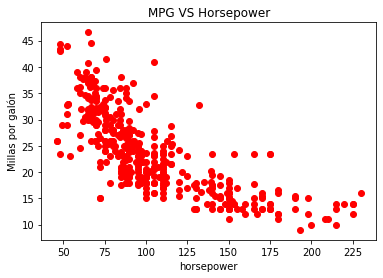

In [15]:
mpl.plot(data_auto["horsepower"], data_auto["mpg"], "ro")
mpl.xlabel("horsepower")
mpl.ylabel("Millas por galón")
mpl.title("MPG VS Horsepower")

## Propuesta de modelo lineal
Se valida el modelo de regresión lineal 
* Ye= Alfa + Beta*X

In [16]:
x1=data_auto["horsepower"].fillna(np.mean(data_auto["mpg"]))
y1=data_auto["mpg"].fillna(np.mean(data_auto["mpg"]))
lm_1= LinearRegression()
lm_1.fit(x1[:,np.newaxis], y1)
type(data_auto["horsepower"]), type(y1)

(pandas.core.series.Series, pandas.core.series.Series)

In [17]:
predict_1=lm_1.predict(x1[:,np.newaxis])
x_correct = x1[:,np.newaxis]

Text(0.5, 1.0, 'MPG VS Horsepower - Regresión lineal')

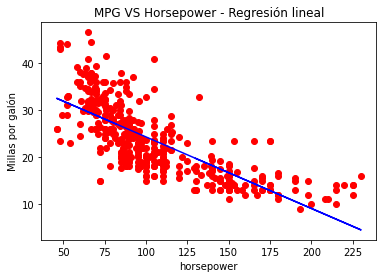

In [18]:
mpl.plot(data_auto["horsepower"], data_auto["mpg"], "ro")
mpl.plot(x_correct , predict_1, color="blue")
mpl.xlabel("horsepower")
mpl.ylabel("Millas por galón")
mpl.title("MPG VS Horsepower - Regresión lineal")

In [19]:
score_lm_1=lm_1.score(x1[:,np.newaxis], y1)
SSD=sum((predict_1 - y1)**2)
RSE_lm_1=np.sqrt(SSD/len(x_correct)-2)
y_lm_1_mean = np.mean(y1)
error_lm_1= RSE_lm_1/y_lm_1_mean
score_lm_1,RSE_lm_1, y_lm_1_mean, error_lm_1

(0.574653340645025, 4.838207938820257, 23.51457286432162, 0.20575359657760195)

## Resultados del modelo de regresión lineal
* R^2: 0.574653340645025
* RSE: 4.84 Millas por galón de error al predecir.
* Promedio de MPG: 23.51457286432162 Millas por galón
* Tasa de error en la predicción: 20,58%

## Propuesta de modelo Cuadrático
Se valida el modelo de regresión lineal 
* Ye= Alfa + Beta*X^2

In [20]:
x2=x1**2
y2=data_auto["mpg"].fillna(np.mean(data_auto["mpg"]))
lm_2= LinearRegression()
lm_2.fit(x2[:,np.newaxis], y2)
type(data_auto["horsepower"]), type(y2)

(pandas.core.series.Series, pandas.core.series.Series)

In [21]:
predict_2=lm_2.predict(x2[:,np.newaxis])
x_correct_2 = x2[:,np.newaxis]

mpl.plot(x2, y2, "ro")
mpl.plot(x_correct_2 , predict_2, color="blue")
mpl.xlabel("horsepower")
mpl.ylabel("Millas por galón")
mpl.title("MPG VS Horsepower - regresión cuadrática")

In [22]:
score_lm_2=lm_2.score(x_correct, y2)
SSD=sum((predict_2 - y2)**2)
RSE_lm_2=np.sqrt(SSD/len(x_correct)-2)
y_lm_2_mean = np.mean(y2)
error_lm_2= RSE_lm_2/y_lm_2_mean
score_lm_2,RSE_lm_2, y_lm_2_mean, error_lm_2

(-0.7775309444126928, 5.36324619103671, 23.51457286432162, 0.22808180365352496)

## Resultados del modelo de regresión cuadrática
* R^2: 0.4849887034823205
* RSE: 5.36 Millas por galón de error al predecir.
* Promedio de MPG: 23.5145Millas por galón
* Tasa de error en la predicción: 22,80%

## Propuesta de regresión polnomica no lineal, 

Ye= Alfa + Beta*X^d + Gamma*X^d

Donde:

* Alfa es la interposición
* Beta es el resultado de la regresión lineal
* Gamma es la beta de la regresión cuadrática
* Posición del grado que eleva

In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [24]:
poly = PolynomialFeatures(degree=2)
xp_data = poly.fit_transform(x1[:,np.newaxis])

In [25]:
lm_poly= linear_model.LinearRegression()
lm_poly.fit(xp_data,y1)

LinearRegression()

In [26]:
lm_poly.score(xp_data,y1),lm_poly.intercept_,lm_poly.coef_

(0.6439066584257469,
 55.02619244708117,
 array([ 0.        , -0.43404318,  0.00112615]))

## Resultados del modelo de regresión lineal

* R^2: 0.644
* intercepcción: 55.02619244708117
* Coeficiente:-0.43404318,  0.00112615

    * Ye= 55.02619244708117 + -0.43404318*horsepower + 0.00112615*horsepower^2
_________________________________________
## Bucle de niveles de grado

In [27]:
for d in range(2,8):
    poly = PolynomialFeatures(degree=d)
    xp_data = poly.fit_transform(x1[:,np.newaxis])
    lm_poly= linear_model.LinearRegression()
    lm_poly.fit(xp_data,y1)
    print("Grado del modelo:"+str(d))
    print("R^2")
    print(lm_poly.score(xp_data,y1))
    print("Incercepción: ")
    print(lm_poly.intercept_)
    print("Coeficiente_ ")
    print(lm_poly.coef_)
    predict_lm_poly=lm_poly.predict(xp_data)
    SSD=sum((predict_lm_poly - y1)**2)
    RSE_lm_poly=np.sqrt(SSD/len(xp_data)-2)
    y_lm_poly_mean = np.mean(y1)
    error_lm_poly= RSE_lm_poly/y_lm_poly_mean
    print("RSE")
    print(RSE_lm_poly)
    print("Milla por galón promedio")
    print(y_lm_poly_mean)
    print("Probabilidad de error")
    print(round(error_lm_poly*100,2))
    print("_______________________________")

Grado del modelo:2
R^2
0.6439066584257469
Incercepción: 
55.02619244708117
Coeficiente_ 
[ 0.         -0.43404318  0.00112615]
RSE
4.389918096659728
Milla por galón promedio
23.51457286432162
Probabilidad de error
18.67
_______________________________
Grado del modelo:3
R^2
0.6444678885560744
Incercepción: 
58.44877411167232
Coeficiente_ 
[ 0.00000000e+00 -5.27113167e-01  1.89736722e-03 -1.95723195e-06]
RSE
4.386097990788554
Milla por galón promedio
23.51457286432162
Probabilidad de error
18.65
_______________________________
Grado del modelo:4
R^2
0.6467674189704501
Incercepción: 
40.09664385584597
Coeficiente_ 
[ 0.00000000e+00  1.62563541e-01 -7.10892744e-03  4.65580255e-05
 -9.15840093e-08]
RSE
4.37041098733913
Milla por galón promedio
23.51457286432162
Probabilidad de error
18.59
_______________________________
Grado del modelo:5
R^2
0.6547512491379645
Incercepción: 
-40.69402849011807
Coeficiente_ 
[ 0.00000000e+00  4.00021893e+00 -7.54802467e-02  6.19621641e-04
 -2.36220985e-06 

_________________________________________
## problema de los outliers

In [29]:
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


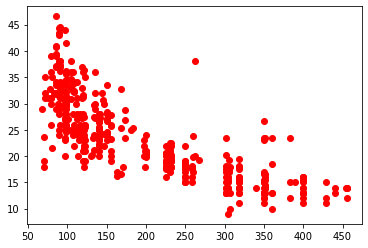

In [43]:
mpl.plot(data_auto["displacement"], data_auto["mpg"],"ro")

In [44]:
lm_ol= LinearRegression()
x_ol=data_auto["displacement"]
lm_ol.fit(x_ol[:,np.newaxis],data_auto["mpg"])

LinearRegression()

In [45]:
lm_ol.score(x_ol[:,np.newaxis],data_auto["mpg"])

0.6261049762826918

In [53]:
y_ol=data_auto["mpg"]
lm_ol_predict= lm_ol.predict(x_ol[:,np.newaxis])

**Data set tiene con los outliers tiene un R^2 de 62,2%**

Text(0.5, 1.0, 'MPG VS displacement')

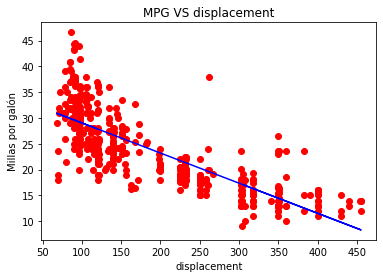

In [54]:
mpl.plot(data_auto["displacement"], data_auto["mpg"], "ro")
mpl.plot(data_auto["displacement"] ,lm_ol_predict , color="blue")
mpl.xlabel("displacement")
mpl.ylabel("Millas por galón")
mpl.title("MPG VS displacement")

### Se procede a localizar y eliminar manualmente los registros en los extremos.

In [60]:
data_auto[(data_auto["mpg"]>44)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
329,46.6,4,86.0,65.0,2110,17.9,80,3,mazda glc
332,44.3,4,90.0,48.0,2085,21.7,80,2,vw rabbit c (diesel)
336,44.6,4,91.0,67.0,1850,13.8,80,3,honda civic 1500 gl


In [59]:
data_auto[(data_auto["mpg"]>35)&(data_auto["displacement"]> 250)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
395,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)


In [67]:
data_auto[(data_auto["mpg"]>24)&(data_auto["displacement"]> 300)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
372,26.6,8,350.0,105.0,3725,19.0,81,1,oldsmobile cutlass ls


**Se procede a eliminar los parametros outlier y hacer el modelo nuevamente**

In [70]:
data_auto_clean= data_auto.drop([329,332,336,395,372])

Text(0.5, 1.0, 'MPG VS displacement')

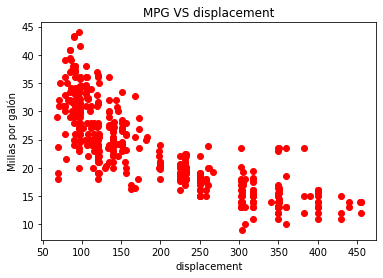

In [72]:
mpl.plot(data_auto_clean["displacement"], data_auto_clean["mpg"], "ro")
mpl.xlabel("displacement")
mpl.ylabel("Millas por galón")
mpl.title("MPG VS displacement")

In [74]:
lm_ol= LinearRegression()
x_ol=data_auto_clean["displacement"]
lm_ol.fit(x_ol[:,np.newaxis],data_auto_clean["mpg"])
lm_ol.score(x_ol[:,np.newaxis],data_auto_clean["mpg"])

0.6529867551916405

Text(0.5, 1.0, 'MPG VS displacement + linea de valores generados')

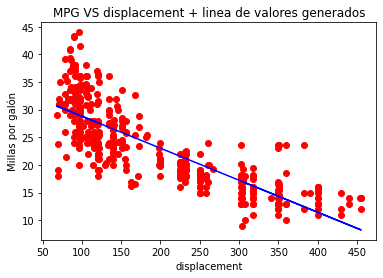

In [75]:
lm_ol_predict= lm_ol.predict(x_ol[:,np.newaxis])
mpl.plot(data_auto_clean["displacement"], data_auto_clean["mpg"], "ro")
mpl.plot(data_auto_clean["displacement"] ,lm_ol_predict , color="blue")
mpl.xlabel("displacement")
mpl.ylabel("Millas por galón")
mpl.title("MPG VS displacement + linea de valores generados")

**Diagrama mejora un 3% en su capacidad de predecir valores, el toral es de 65,2%**